In [2]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [3]:
# Define our Dataset
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,10,15,12,10,14,13,15,10]

## Find Mean, Median, Mode, Variance, Standard deviation

In [7]:
dataset.sort()
print(dataset)

[10, 10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]


(array([33.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

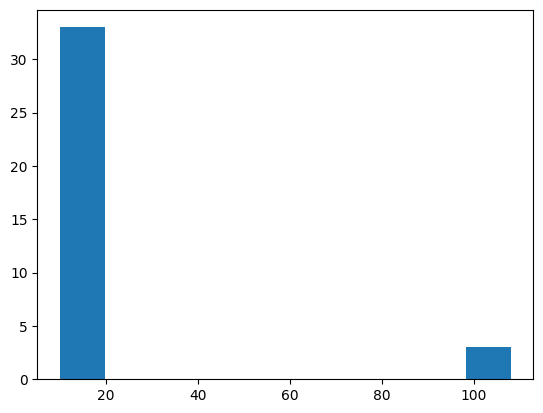

In [30]:
# Draw histogram
plt.hist(dataset)

In [11]:
len(dataset)

36

In [21]:
# Mean of dataset
mean=np.mean(dataset)
print("Mean:", mean)

Mean: 20.694444444444443


In [10]:
# Median of dataset
median = np.median(dataset)
median

13.0

In [16]:
dataset[17]

13

In [18]:
# Mode of data set
from scipy import stats
mode = stats.mode(dataset)
print("Mode:", mode.mode[0])
print("Mode count:", mode.count[0])

Mode: 12
Mode count: 7


C:\Users\HP\AppData\Local\Temp\ipykernel_332\3402203678.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(dataset)


In [20]:
# Finding Mode using Dictionary
dic={}
for i in dataset:
    if i in dic:
        dic[i]=dic[i]+1
    else:
        dic[i]=1
print(dic.items())

dict_items([(10, 6), (11, 2), (12, 7), (13, 4), (14, 6), (15, 6), (17, 1), (19, 1), (102, 1), (107, 1), (108, 1)])


In [22]:
# Variance
variance = np.var(dataset)
print("Variance:", variance)

Variance: 661.1566358024692


In [23]:
# S. D
std=np.std(dataset)
std

25.712966297229677

Finding Outlier using IQR

## IQR

1. Sort the Data
2. Calculate Q1 and Q2
3. IQR=Q3-Q1
4. Find lower fence = Q1-1.5(IQR)
5. Find upper fence = Q3+1.5(IQR)


In [35]:
dataset.sort()
print(dataset)

[10, 10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]


In [36]:
q1,q3=np.percentile(dataset,[25,75])

In [37]:
print(q1,q3)

12.0 15.0


In [39]:
iqr=q3-q1
iqr

3.0

In [40]:
# Find lower fence and higher fence
lower_fence=q1-1.5*iqr
higher_fance=q3+1.5*iqr

In [41]:
print(lower_fence,higher_fance)

7.5 19.5


In [46]:
# Find outlire
out=[]
for i in dataset:
    if i<lower_fence or i> higher_fance:
        out.append(i)
print(out)

[102, 107, 108]


In [44]:
import seaborn as sns

<AxesSubplot: >

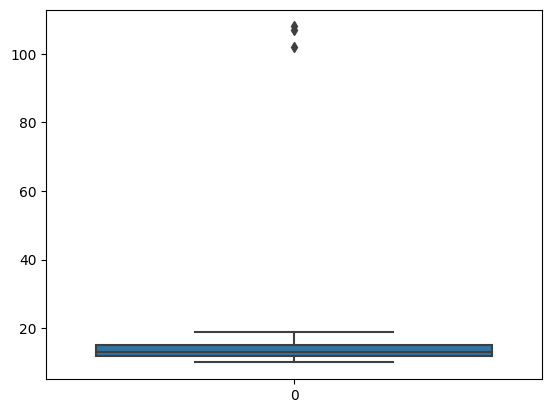

In [47]:
sns.boxplot(dataset)

In [27]:
# Outlier Using Z-Score

In [28]:
# Define our Dataset
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,10,15,12,10,14,13,15,10]

In [31]:
outliers=[]

def detect_outlier(data):
    threshold=3   ## 3rd Std deviation
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [32]:
detect_outlier(dataset)

[102, 107, 108]